We define $\rho = (n,\cdots,1)$ for GLn as a function on $n$ valued rank $n$ vectors.

In [21]:
def rho(n):
    l = [1]
    i=ZZ(2)
    while i < n+1:
        l.insert(0,i)
        i=i+1
    return vector(l)

In [22]:
rho(7)

(7, 6, 5, 4, 3, 2, 1)

We know that $R^2 : L_a\otimes L_b \to L_b\otimes L_a \to L_a\otimes L_b$ act as a certain power of $q$ when restricted to the summand isomorphic to $L_c$. The exponent is given by the function qpower:

In [4]:
def vector_of_the_correct_rank(n,c):
    while len(c)<n:
        c.append(0)
    return vector(c)

In [5]:
def qpower(n,a,b,c):
    c = vector_of_the_correct_rank(n,list(c))
    a = vector_of_the_correct_rank(n,list(a))
    b = vector_of_the_correct_rank(n,list(b))
    return a*a + b*b - c*c + 2*rho(n)*(a + b - c)

We extract the partitions appearing in 'lrcalc.mult' (Littlewood-Richardson coefficients).

In [24]:
import sage.libs.lrcalc.lrcalc as lrcalc

In [23]:
def summands(a,b):
    return lrcalc.mult(a,b).keys()

Then the following gives the list of the eigenvalues for $R^2$ on $L_a\otimes L_b$.

In [7]:
def qpowers(n,a,b):
    qp = []
    for c in summands(a,b):
        c = list(c)
        qp.append(qpower(2*n,a,b,c))
    return qp

In [8]:
qpowers(2,[1],[1])

[-2, 2]

We iterate the 'summands' function for the defining module $V=L_{[1]}$ to get the summands in $V^{\otimes n}$.

In [35]:
def summands_in_tensor_power(n):
    if n == 1:
        return {Partition([1])}
    else:
        sm = set()
        for a in summands_in_tensor_power(n-1):
            sm = sm.union(set(summands(a,[1])))
        return sm

In [10]:
summands_in_tensor_power(1)

{[1]}

In [11]:
summands_in_tensor_power(2)

{[1, 1], [2]}

Now can define a function which gives the list of eigenvalues for $R^2$ on $V^{\otimes n}$.

In [12]:
from itertools import product

In [13]:
def eigenvalues_for_tensor_power(n):
    qp = set()
    for a,b in product(summands_in_tensor_power(n),repeat = 2):
        qp = qp.union(set(qpowers(2*n,a,b)))
    return qp        

In [14]:
eigenvalues_for_tensor_power(2)

{-8, -4, 0, 4, 8}

In [15]:
eigenvalues_for_tensor_power(4)

{-32,
 -24,
 -20,
 -16,
 -14,
 -12,
 -10,
 -8,
 -6,
 -4,
 -2,
 0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 20,
 24,
 32}

A compact form for plotting:

In [53]:
def positive_powers_evtp(n):
    pp = []
    for i in eigenvalues_for_tensor_power(n):
        if i > -1:
            pp.append(i//2)
    return pp

In [54]:
positive_powers_evtp(6)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 26,
 30,
 36]

In [79]:
def pl(n):
    return plot(positive_powers_evtp(n),n-(0.47),n+(0.47))

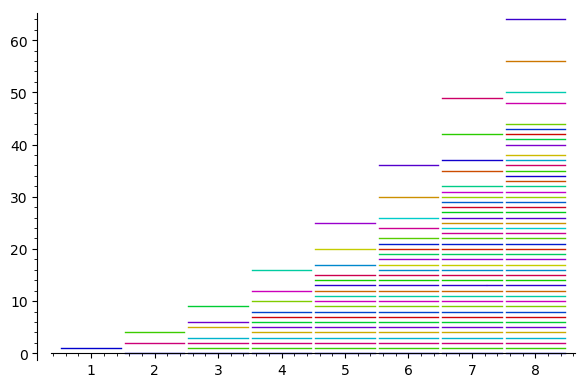

In [80]:
pl(1) + pl(2) +pl(3)+pl(4)+pl(5)+pl(6)+pl(7)+pl(8)

In [ ]:
pl(1) + pl(2) +pl(3)+pl(4)+pl(5)+pl(6)+pl(7)+pl(8)+pl(9)+pl(10)+pl(11)+pl(12)+pl(13)+pl(14)

In [68]:
n = var('n')
sum(pl(n), n, 1,4)

RuntimeError: maximum recursion depth exceeded while calling a Python object

The values $q^{n^2}$ and $-q^{-n^2}$ are always eigenvalues of $R_{V^{\otimes n}}$ (the former on the symmetric power and the latter on the exterior power) and the values $-q^{n^2}$ and $q^{-n^2}$ are never eigenvalues of $R$ (why?). So we ignore them in the computation.

Question : is 1 always an eigenvalue for $R^2$?

In [16]:
def nontrivial_possible_eigenvalues_for_tensor_power(n):
    var('q')
    l=[]
    for i in eigenvalues_for_tensor_power(n):
        if i != 2*n^2 and i != -2*n^2:
            l.append(-q^(ZZ(i)//2))
            l.append(q^(ZZ(i)//2))
    return l

In [20]:
nontrivial_possible_eigenvalues_for_tensor_power(1)

[]

In [17]:
nontrivial_possible_eigenvalues_for_tensor_power(2)

[-1, 1, -q^2, q^2, -1/q^2, q^(-2)]

In [18]:
nontrivial_possible_eigenvalues_for_tensor_power(3)

[-1,
 1,
 -q,
 q,
 -q^2,
 q^2,
 -q^3,
 q^3,
 -q^5,
 q^5,
 -q^6,
 q^6,
 -1/q^6,
 q^(-6),
 -1/q^5,
 q^(-5),
 -1/q^3,
 q^(-3),
 -1/q^2,
 q^(-2),
 -1/q,
 1/q]

In [19]:
nontrivial_possible_eigenvalues_for_tensor_power(4)

[-1,
 1,
 -q,
 q,
 -q^2,
 q^2,
 -q^3,
 q^3,
 -q^4,
 q^4,
 -q^5,
 q^5,
 -q^6,
 q^6,
 -q^7,
 q^7,
 -q^8,
 q^8,
 -q^10,
 q^10,
 -q^12,
 q^12,
 -1/q^12,
 q^(-12),
 -1/q^10,
 q^(-10),
 -1/q^8,
 q^(-8),
 -1/q^7,
 q^(-7),
 -1/q^6,
 q^(-6),
 -1/q^5,
 q^(-5),
 -1/q^4,
 q^(-4),
 -1/q^3,
 q^(-3),
 -1/q^2,
 q^(-2),
 -1/q,
 1/q]

In [27]:
for i in range(1,20):
    %%time
    evi= nontrivial_possible_eigenvalues_for_tensor_power(i)
    print evi

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11 µs
[]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 18.1 µs
[-1, 1, -q^2, q^2, -1/q^2, q^(-2)]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs
[-1, 1, -q, q, -q^2, q^2, -q^3, q^3, -q^5, q^5, -q^6, q^6, -1/q^6, q^(-6), -1/q^5, q^(-5), -1/q^3, q^(-3), -1/q^2, q^(-2), -1/q, 1/q]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs
[-1, 1, -q, q, -q^2, q^2, -q^3, q^3, -q^4, q^4, -q^5, q^5, -q^6, q^6, -q^7, q^7, -q^8, q^8, -q^10, q^10, -q^12, q^12, -1/q^12, q^(-12), -1/q^10, q^(-10), -1/q^8, q^(-8), -1/q^7, q^(-7), -1/q^6, q^(-6), -1/q^5, q^(-5), -1/q^4, q^(-4), -1/q^3, q^(-3), -1/q^2, q^(-2), -1/q, 1/q]
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
[-1, 1, -q, q, -q^2, q^2, -q^3, q^3, -q^4, q^4, -q^5, q^5, -q^6, q^6, -q^7, q^7, -q^8, q^8, -q^9, q^9, -q^10, q^10, -q^11, q^11, -q^12, q^12, -q^13, q^13, -q^14, q^14, -q^15, q^15, -q^17, q^17, -q^20, q^20, -1/q^20, q^(-20), -1/q^17,

[-1, 1, -q, q, -q^2, q^2, -q^3, q^3, -q^4, q^4, -q^5, q^5, -q^6, q^6, -q^7, q^7, -q^8, q^8, -q^9, q^9, -q^10, q^10, -q^11, q^11, -q^12, q^12, -q^13, q^13, -q^14, q^14, -q^15, q^15, -q^16, q^16, -q^17, q^17, -q^18, q^18, -q^19, q^19, -q^20, q^20, -q^21, q^21, -q^22, q^22, -q^23, q^23, -q^24, q^24, -q^25, q^25, -q^26, q^26, -q^27, q^27, -q^28, q^28, -q^29, q^29, -q^30, q^30, -q^31, q^31, -q^32, q^32, -q^33, q^33, -q^34, q^34, -q^35, q^35, -q^36, q^36, -q^37, q^37, -q^38, q^38, -q^39, q^39, -q^40, q^40, -q^41, q^41, -q^42, q^42, -q^43, q^43, -q^44, q^44, -q^45, q^45, -q^46, q^46, -q^47, q^47, -q^48, q^48, -q^49, q^49, -q^50, q^50, -q^51, q^51, -q^52, q^52, -q^53, q^53, -q^54, q^54, -q^55, q^55, -q^56, q^56, -q^57, q^57, -q^58, q^58, -q^59, q^59, -q^60, q^60, -q^61, q^61, -q^62, q^62, -q^63, q^63, -q^64, q^64, -q^65, q^65, -q^66, q^66, -q^67, q^67, -q^68, q^68, -q^69, q^69, -q^70, q^70, -q^71, q^71, -q^72, q^72, -q^73, q^73, -q^74, q^74, -q^75, q^75, -q^76, q^76, -q^77, q^77, -q^78, q^78, 

KeyboardInterrupt: 

In [28]:
%%time
nontrivial_possible_eigenvalues_for_tensor_power(11)

CPU times: user 3min 47s, sys: 32.6 s, total: 4min 19s
Wall time: 4min 21s


[-1,
 1,
 -q,
 q,
 -q^2,
 q^2,
 -q^3,
 q^3,
 -q^4,
 q^4,
 -q^5,
 q^5,
 -q^6,
 q^6,
 -q^7,
 q^7,
 -q^8,
 q^8,
 -q^9,
 q^9,
 -q^10,
 q^10,
 -q^11,
 q^11,
 -q^12,
 q^12,
 -q^13,
 q^13,
 -q^14,
 q^14,
 -q^15,
 q^15,
 -q^16,
 q^16,
 -q^17,
 q^17,
 -q^18,
 q^18,
 -q^19,
 q^19,
 -q^20,
 q^20,
 -q^21,
 q^21,
 -q^22,
 q^22,
 -q^23,
 q^23,
 -q^24,
 q^24,
 -q^25,
 q^25,
 -q^26,
 q^26,
 -q^27,
 q^27,
 -q^28,
 q^28,
 -q^29,
 q^29,
 -q^30,
 q^30,
 -q^31,
 q^31,
 -q^32,
 q^32,
 -q^33,
 q^33,
 -q^34,
 q^34,
 -q^35,
 q^35,
 -q^36,
 q^36,
 -q^37,
 q^37,
 -q^38,
 q^38,
 -q^39,
 q^39,
 -q^40,
 q^40,
 -q^41,
 q^41,
 -q^42,
 q^42,
 -q^43,
 q^43,
 -q^44,
 q^44,
 -q^45,
 q^45,
 -q^46,
 q^46,
 -q^47,
 q^47,
 -q^48,
 q^48,
 -q^49,
 q^49,
 -q^50,
 q^50,
 -q^51,
 q^51,
 -q^52,
 q^52,
 -q^53,
 q^53,
 -q^54,
 q^54,
 -q^55,
 q^55,
 -q^56,
 q^56,
 -q^57,
 q^57,
 -q^58,
 q^58,
 -q^59,
 q^59,
 -q^60,
 q^60,
 -q^61,
 q^61,
 -q^62,
 q^62,
 -q^63,
 q^63,
 -q^64,
 q^64,
 -q^65,
 q^65,
 -q^66,
 q^66,
 -q^67,
 q^67,
 -q^68,


In [29]:
%%time
nontrivial_possible_eigenvalues_for_tensor_power(10)

CPU times: user 1min 18s, sys: 10.6 s, total: 1min 28s
Wall time: 1min 29s


[-1,
 1,
 -q,
 q,
 -q^2,
 q^2,
 -q^3,
 q^3,
 -q^4,
 q^4,
 -q^5,
 q^5,
 -q^6,
 q^6,
 -q^7,
 q^7,
 -q^8,
 q^8,
 -q^9,
 q^9,
 -q^10,
 q^10,
 -q^11,
 q^11,
 -q^12,
 q^12,
 -q^13,
 q^13,
 -q^14,
 q^14,
 -q^15,
 q^15,
 -q^16,
 q^16,
 -q^17,
 q^17,
 -q^18,
 q^18,
 -q^19,
 q^19,
 -q^20,
 q^20,
 -q^21,
 q^21,
 -q^22,
 q^22,
 -q^23,
 q^23,
 -q^24,
 q^24,
 -q^25,
 q^25,
 -q^26,
 q^26,
 -q^27,
 q^27,
 -q^28,
 q^28,
 -q^29,
 q^29,
 -q^30,
 q^30,
 -q^31,
 q^31,
 -q^32,
 q^32,
 -q^33,
 q^33,
 -q^34,
 q^34,
 -q^35,
 q^35,
 -q^36,
 q^36,
 -q^37,
 q^37,
 -q^38,
 q^38,
 -q^39,
 q^39,
 -q^40,
 q^40,
 -q^41,
 q^41,
 -q^42,
 q^42,
 -q^43,
 q^43,
 -q^44,
 q^44,
 -q^45,
 q^45,
 -q^46,
 q^46,
 -q^47,
 q^47,
 -q^48,
 q^48,
 -q^49,
 q^49,
 -q^50,
 q^50,
 -q^51,
 q^51,
 -q^52,
 q^52,
 -q^53,
 q^53,
 -q^54,
 q^54,
 -q^55,
 q^55,
 -q^56,
 q^56,
 -q^57,
 q^57,
 -q^58,
 q^58,
 -q^59,
 q^59,
 -q^60,
 q^60,
 -q^61,
 q^61,
 -q^62,
 q^62,
 -q^63,
 q^63,
 -q^64,
 q^64,
 -q^65,
 q^65,
 -q^66,
 q^66,
 -q^68,
 q^68,
 -q^70,


In [30]:
%%time
nontrivial_possible_eigenvalues_for_tensor_power(12)

CPU times: user 10min 41s, sys: 1min 29s, total: 12min 10s
Wall time: 12min 11s


[-1,
 1,
 -q,
 q,
 -q^2,
 q^2,
 -q^3,
 q^3,
 -q^4,
 q^4,
 -q^5,
 q^5,
 -q^6,
 q^6,
 -q^7,
 q^7,
 -q^8,
 q^8,
 -q^9,
 q^9,
 -q^10,
 q^10,
 -q^11,
 q^11,
 -q^12,
 q^12,
 -q^13,
 q^13,
 -q^14,
 q^14,
 -q^15,
 q^15,
 -q^16,
 q^16,
 -q^17,
 q^17,
 -q^18,
 q^18,
 -q^19,
 q^19,
 -q^20,
 q^20,
 -q^21,
 q^21,
 -q^22,
 q^22,
 -q^23,
 q^23,
 -q^24,
 q^24,
 -q^25,
 q^25,
 -q^26,
 q^26,
 -q^27,
 q^27,
 -q^28,
 q^28,
 -q^29,
 q^29,
 -q^30,
 q^30,
 -q^31,
 q^31,
 -q^32,
 q^32,
 -q^33,
 q^33,
 -q^34,
 q^34,
 -q^35,
 q^35,
 -q^36,
 q^36,
 -q^37,
 q^37,
 -q^38,
 q^38,
 -q^39,
 q^39,
 -q^40,
 q^40,
 -q^41,
 q^41,
 -q^42,
 q^42,
 -q^43,
 q^43,
 -q^44,
 q^44,
 -q^45,
 q^45,
 -q^46,
 q^46,
 -q^47,
 q^47,
 -q^48,
 q^48,
 -q^49,
 q^49,
 -q^50,
 q^50,
 -q^51,
 q^51,
 -q^52,
 q^52,
 -q^53,
 q^53,
 -q^54,
 q^54,
 -q^55,
 q^55,
 -q^56,
 q^56,
 -q^57,
 q^57,
 -q^58,
 q^58,
 -q^59,
 q^59,
 -q^60,
 q^60,
 -q^61,
 q^61,
 -q^62,
 q^62,
 -q^63,
 q^63,
 -q^64,
 q^64,
 -q^65,
 q^65,
 -q^66,
 q^66,
 -q^67,
 q^67,
 -q^68,


In [31]:
%%time
nontrivial_possible_eigenvalues_for_tensor_power(13)

CPU times: user 29min 25s, sys: 3min 58s, total: 33min 23s
Wall time: 6h 32min 36s


[-1,
 1,
 -q,
 q,
 -q^2,
 q^2,
 -q^3,
 q^3,
 -q^4,
 q^4,
 -q^5,
 q^5,
 -q^6,
 q^6,
 -q^7,
 q^7,
 -q^8,
 q^8,
 -q^9,
 q^9,
 -q^10,
 q^10,
 -q^11,
 q^11,
 -q^12,
 q^12,
 -q^13,
 q^13,
 -q^14,
 q^14,
 -q^15,
 q^15,
 -q^16,
 q^16,
 -q^17,
 q^17,
 -q^18,
 q^18,
 -q^19,
 q^19,
 -q^20,
 q^20,
 -q^21,
 q^21,
 -q^22,
 q^22,
 -q^23,
 q^23,
 -q^24,
 q^24,
 -q^25,
 q^25,
 -q^26,
 q^26,
 -q^27,
 q^27,
 -q^28,
 q^28,
 -q^29,
 q^29,
 -q^30,
 q^30,
 -q^31,
 q^31,
 -q^32,
 q^32,
 -q^33,
 q^33,
 -q^34,
 q^34,
 -q^35,
 q^35,
 -q^36,
 q^36,
 -q^37,
 q^37,
 -q^38,
 q^38,
 -q^39,
 q^39,
 -q^40,
 q^40,
 -q^41,
 q^41,
 -q^42,
 q^42,
 -q^43,
 q^43,
 -q^44,
 q^44,
 -q^45,
 q^45,
 -q^46,
 q^46,
 -q^47,
 q^47,
 -q^48,
 q^48,
 -q^49,
 q^49,
 -q^50,
 q^50,
 -q^51,
 q^51,
 -q^52,
 q^52,
 -q^53,
 q^53,
 -q^54,
 q^54,
 -q^55,
 q^55,
 -q^56,
 q^56,
 -q^57,
 q^57,
 -q^58,
 q^58,
 -q^59,
 q^59,
 -q^60,
 q^60,
 -q^61,
 q^61,
 -q^62,
 q^62,
 -q^63,
 q^63,
 -q^64,
 q^64,
 -q^65,
 q^65,
 -q^66,
 q^66,
 -q^67,
 q^67,
 -q^68,
